In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Timestamps and associated operations

In [2]:
now = pd.Timestamp('now')

now

Timestamp('2023-05-27 07:13:50.023679')

In [3]:
print(f'{now.year=}')
print(f'{now.month=}')
print(f'{now.day=}')
print(f'{now.hour=}')
print(f'{now.minute=}')
print(f'{now.second=}')
print(f'{now.microsecond=}')

now.year=2023
now.month=5
now.day=27
now.hour=7
now.minute=13
now.second=50
now.microsecond=23679


In [4]:
now.date()

datetime.date(2023, 5, 27)

In [5]:
now.time()

datetime.time(7, 13, 50, 23679)

In [6]:
now.day_of_week

5

In [7]:
now.day_name()

'Saturday'

In [8]:
now.is_leap_year

False

In [9]:
t1 = pd.Timestamp(2023, 5, 27)
t2 = pd.Timestamp(2023, 3, 27, 12)

t1, t2

(Timestamp('2023-05-27 00:00:00'), Timestamp('2023-03-27 12:00:00'))

In [11]:
t1 > t2

True

In [12]:
diff = t1 - t2

In [16]:
diff.days * 24 + diff.seconds / 60 / 60

1452.0

In [18]:
diff / pd.Timedelta(hours=1)

1452.0

In [20]:
now + pd.Timedelta(days=7*5)

Timestamp('2023-07-01 07:13:50.023679')

In [22]:
hundred_days_ago = now - pd.Timedelta(days=100)
hundred_days_ago.day_name()

'Thursday'

In [24]:
date_list = [t1, t2, now, hundred_days_ago, pd.Timestamp(1980, 1, 1)]

In [25]:
min(date_list)

Timestamp('1980-01-01 00:00:00')

In [26]:
max(date_list)

Timestamp('2023-05-27 07:13:50.023679')

In [27]:
sorted(date_list)

[Timestamp('1980-01-01 00:00:00'),
 Timestamp('2023-02-16 07:13:50.023679'),
 Timestamp('2023-03-27 12:00:00'),
 Timestamp('2023-05-27 00:00:00'),
 Timestamp('2023-05-27 07:13:50.023679')]

In [29]:
pd.date_range(start='2023-01-01', end='2023-05-27', freq='12H')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 12:00:00',
               '2023-01-02 00:00:00', '2023-01-02 12:00:00',
               '2023-01-03 00:00:00', '2023-01-03 12:00:00',
               '2023-01-04 00:00:00', '2023-01-04 12:00:00',
               '2023-01-05 00:00:00', '2023-01-05 12:00:00',
               ...
               '2023-05-22 12:00:00', '2023-05-23 00:00:00',
               '2023-05-23 12:00:00', '2023-05-24 00:00:00',
               '2023-05-24 12:00:00', '2023-05-25 00:00:00',
               '2023-05-25 12:00:00', '2023-05-26 00:00:00',
               '2023-05-26 12:00:00', '2023-05-27 00:00:00'],
              dtype='datetime64[ns]', length=293, freq='12H')

In [30]:
pd.Timestamp('2023-03-01') - pd.Timestamp('2023-02-26')

Timedelta('3 days 00:00:00')

In [31]:
pd.Timestamp('2022-03-01') - pd.Timestamp('2022-02-26')

Timedelta('3 days 00:00:00')

In [32]:
pd.Timestamp('2021-03-01') - pd.Timestamp('2021-02-26')

Timedelta('3 days 00:00:00')

In [33]:
pd.Timestamp('2020-03-01') - pd.Timestamp('2020-02-26')

Timedelta('4 days 00:00:00')

In [34]:
pd.Timestamp('2024-03-01') - pd.Timestamp('2024-02-26')

Timedelta('4 days 00:00:00')

## Parsing time

2023-03-01 12:00  
1/3/2023 at time 12 PM  
12.00 on 3/1/2023  
March 1st 2023, 12 o' clock noon

In [41]:
fmt = '%d/%m/%Y'

pd.Timestamp(2023, 3, 1).strftime(fmt)

'01/03/2023'

In [50]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

df = pd.read_csv(url)  # parse_dates=['Month']

df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [44]:
df.dtypes

Month         object
Passengers     int64
dtype: object

In [47]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [48]:
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [49]:
df.iloc[0, 0] 

Timestamp('1949-01-01 00:00:00')

Number of passengers after 1955

In [56]:
df[df['Month'] >= pd.Timestamp('1955')]['Passengers'].sum()

27194

Average yearly passengers

In [59]:
df['year'] = df['Month'].apply(lambda x: x.year)

df.groupby('year')['Passengers'].mean()

year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: Passengers, dtype: float64

Datetime as index

In [62]:
df.index = df['Month']

In [66]:
df.loc['1955':, 'Passengers'].sum()

27194

In [67]:
ps = df['Passengers']

ps

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [68]:
ps['1955':].sum()

27194

In [69]:
pd.Timestamp('1955')

Timestamp('1955-01-01 00:00:00')

## Plotting

Text(0, 0.5, 'Passengers')

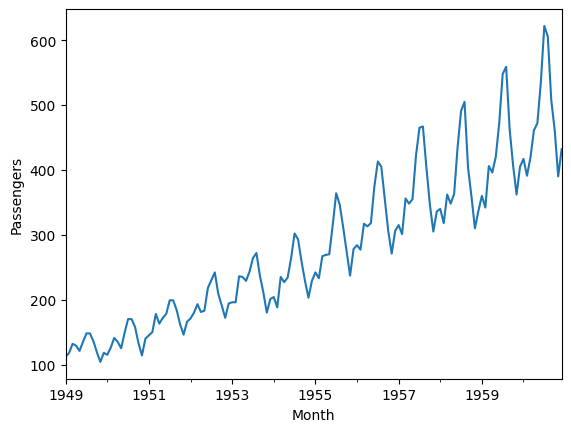

In [72]:
ax = ps.plot()

ax.set_ylabel('Passengers')

## COVID data

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

df.index = pd.to_datetime(df['date'])

In [86]:
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2022-10-02,BRN,Asia,Brunei,2022-10-02,229665.0,0.0,272.714,132.0,0.0,0.143,...,30.9,NaN,2.70,75.86,0.838,449002.0,NaN,NaN,NaN,NaN
2022-04-17,EST,Europe,Estonia,2022-04-17,569770.0,286.0,497.143,2516.0,5.0,3.143,...,39.3,NaN,4.69,78.74,0.892,1326064.0,3488.2996,9.54,-0.9,2630.5664
2023-01-31,JOR,Asia,Jordan,2023-01-31,1746997.0,0.0,0.000,14122.0,0.0,0.000,...,NaN,NaN,1.40,74.53,0.729,11285875.0,NaN,NaN,NaN,NaN
2023-01-19,EST,Europe,Estonia,2023-01-19,613324.0,47.0,48.143,2885.0,0.0,0.000,...,39.3,NaN,4.69,78.74,0.892,1326064.0,NaN,NaN,NaN,NaN
2021-10-27,BTN,Asia,Bhutan,2021-10-27,2620.0,3.0,0.429,3.0,0.0,0.000,...,NaN,79.807,1.70,71.78,0.654,782457.0,NaN,NaN,NaN,NaN


In [113]:
gr = df[df['location'] == 'Greece']
gr = gr['2020':'2020']

<Axes: xlabel='date'>

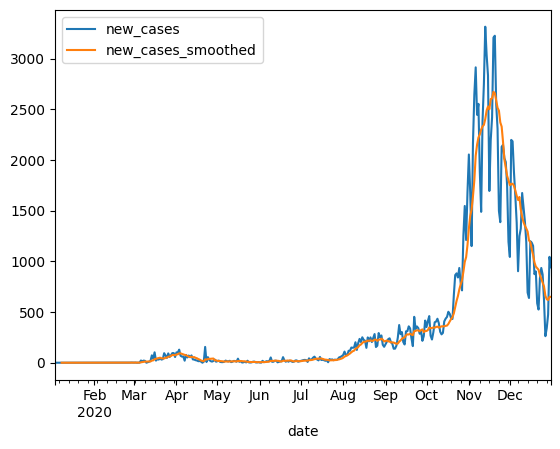

In [116]:
gr[['new_cases', 'new_cases_smoothed']].plot()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

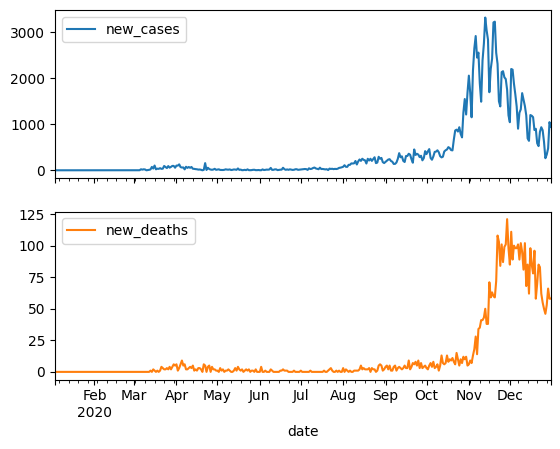

In [118]:
gr[['new_cases', 'new_deaths']].plot(subplots=True)

## Timeseries manipulation

### Shifting

<Axes: xlabel='date'>

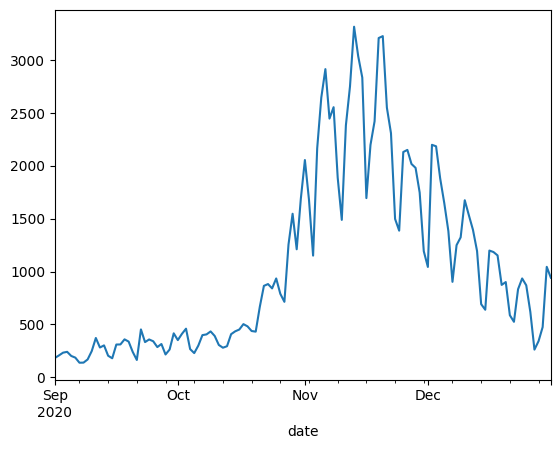

In [121]:
gr2 = gr['2020-09':]
 
gr2['new_cases'].plot()

In [122]:
gr2['new_cases']

date
2020-09-01     183.0
2020-09-02     207.0
2020-09-03     233.0
2020-09-04     241.0
2020-09-05     202.0
               ...  
2020-12-27     262.0
2020-12-28     342.0
2020-12-29     475.0
2020-12-30    1045.0
2020-12-31     942.0
Name: new_cases, Length: 122, dtype: float64

In [125]:
gr2['new_cases'].shift(-2)

date
2020-09-01     233.0
2020-09-02     241.0
2020-09-03     202.0
2020-09-04     186.0
2020-09-05     138.0
               ...  
2020-12-27     475.0
2020-12-28    1045.0
2020-12-29     942.0
2020-12-30       NaN
2020-12-31       NaN
Name: new_cases, Length: 122, dtype: float64

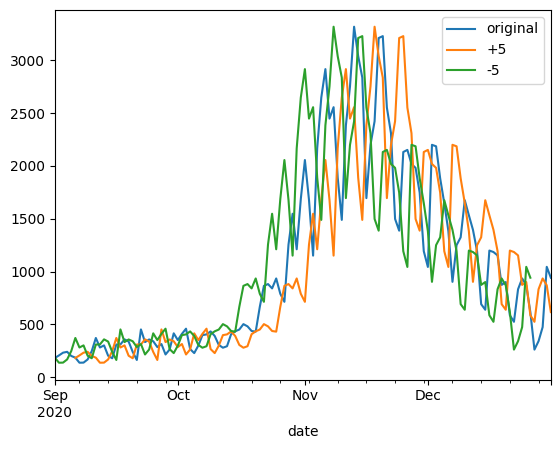

In [127]:
gr2['new_cases'].plot(label='original')
gr2['new_cases'].shift(5).plot(label='+5')
gr2['new_cases'].shift(-5).plot(label='-5')

plt.legend()

## Resampling

Undersampling

In [135]:
gr[-20:]['new_cases']

date
2020-12-12    1395.0
2020-12-13    1194.0
2020-12-14     692.0
2020-12-15     639.0
2020-12-16    1199.0
2020-12-17    1185.0
2020-12-18    1153.0
2020-12-19     874.0
2020-12-20     901.0
2020-12-21     587.0
2020-12-22     525.0
2020-12-23     833.0
2020-12-24     935.0
2020-12-25     870.0
2020-12-26     617.0
2020-12-27     262.0
2020-12-28     342.0
2020-12-29     475.0
2020-12-30    1045.0
2020-12-31     942.0
Name: new_cases, dtype: float64

In [134]:
gr[-20:]['new_cases'].resample('3D').first()

date
2020-12-12    1395.0
2020-12-15     639.0
2020-12-18    1153.0
2020-12-21     587.0
2020-12-24     935.0
2020-12-27     262.0
2020-12-30    1045.0
Freq: 3D, Name: new_cases, dtype: float64

In [136]:
gr[-20:]['new_cases'].resample('3D').last()

date
2020-12-12     692.0
2020-12-15    1185.0
2020-12-18     901.0
2020-12-21     833.0
2020-12-24     617.0
2020-12-27     475.0
2020-12-30     942.0
Freq: 3D, Name: new_cases, dtype: float64

In [137]:
gr[-20:]['new_cases'].resample('3D').mean()

date
2020-12-12    1093.666667
2020-12-15    1007.666667
2020-12-18     976.000000
2020-12-21     648.333333
2020-12-24     807.333333
2020-12-27     359.666667
2020-12-30     993.500000
Freq: 3D, Name: new_cases, dtype: float64

In [141]:
gr['new_cases'].resample('1W').sum()

date
2020-01-05        0.0
2020-01-12        0.0
2020-01-19        0.0
2020-01-26        0.0
2020-02-02        0.0
2020-02-09        0.0
2020-02-16        0.0
2020-02-23        0.0
2020-03-01        5.0
2020-03-08       61.0
2020-03-15      162.0
2020-03-22      302.0
2020-03-29      531.0
2020-04-05      612.0
2020-04-12      408.0
2020-04-19      154.0
2020-04-26      271.0
2020-05-03      114.0
2020-05-10       90.0
2020-05-17      109.0
2020-05-24       57.0
2020-05-31       39.0
2020-06-07       65.0
2020-06-14      132.0
2020-06-21      144.0
2020-06-28      110.0
2020-07-05      145.0
2020-07-12      261.0
2020-07-19      211.0
2020-07-26      183.0
2020-08-02      421.0
2020-08-09      834.0
2020-08-16     1437.0
2020-08-23     1523.0
2020-08-30     1596.0
2020-09-06     1409.0
2020-09-13     1650.0
2020-09-20     1942.0
2020-09-27     2250.0
2020-10-04     2385.0
2020-10-11     2465.0
2020-10-18     2854.0
2020-10-25     5060.0
2020-11-01     9259.0
2020-11-08    15558.0
2020-

Oversampling

In [142]:
gr[-4:]['new_cases']

date
2020-12-28     342.0
2020-12-29     475.0
2020-12-30    1045.0
2020-12-31     942.0
Name: new_cases, dtype: float64

In [164]:
gr[-20:]['new_cases'].resample('6H').asfreq()

date
2020-12-12 00:00:00    1395.0
2020-12-12 06:00:00       NaN
2020-12-12 12:00:00       NaN
2020-12-12 18:00:00       NaN
2020-12-13 00:00:00    1194.0
                        ...  
2020-12-30 00:00:00    1045.0
2020-12-30 06:00:00       NaN
2020-12-30 12:00:00       NaN
2020-12-30 18:00:00       NaN
2020-12-31 00:00:00     942.0
Freq: 6H, Name: new_cases, Length: 77, dtype: float64

In [162]:
gr[-4:]['new_cases'].resample('6H').ffill()

date
2020-12-28 00:00:00     342.0
2020-12-28 06:00:00     342.0
2020-12-28 12:00:00     342.0
2020-12-28 18:00:00     342.0
2020-12-29 00:00:00     475.0
2020-12-29 06:00:00     475.0
2020-12-29 12:00:00     475.0
2020-12-29 18:00:00     475.0
2020-12-30 00:00:00    1045.0
2020-12-30 06:00:00    1045.0
2020-12-30 12:00:00    1045.0
2020-12-30 18:00:00    1045.0
2020-12-31 00:00:00     942.0
Freq: 6H, Name: new_cases, dtype: float64

In [161]:
gr[-4:]['new_cases'].resample('6H').interpolate()

date
2020-12-28 00:00:00     342.00
2020-12-28 06:00:00     375.25
2020-12-28 12:00:00     408.50
2020-12-28 18:00:00     441.75
2020-12-29 00:00:00     475.00
2020-12-29 06:00:00     617.50
2020-12-29 12:00:00     760.00
2020-12-29 18:00:00     902.50
2020-12-30 00:00:00    1045.00
2020-12-30 06:00:00    1019.25
2020-12-30 12:00:00     993.50
2020-12-30 18:00:00     967.75
2020-12-31 00:00:00     942.00
Freq: 6H, Name: new_cases, dtype: float64

Rolling

In [165]:
gr[-7:]['new_cases']

date
2020-12-25     870.0
2020-12-26     617.0
2020-12-27     262.0
2020-12-28     342.0
2020-12-29     475.0
2020-12-30    1045.0
2020-12-31     942.0
Name: new_cases, dtype: float64

In [170]:
gr[-7:]['new_cases'].rolling(3).mean()

date
2020-12-25    583.000000
2020-12-26    407.000000
2020-12-27    359.666667
2020-12-28    620.666667
2020-12-29    820.666667
2020-12-30           NaN
2020-12-31           NaN
Name: new_cases, dtype: float64

<Axes: xlabel='date'>

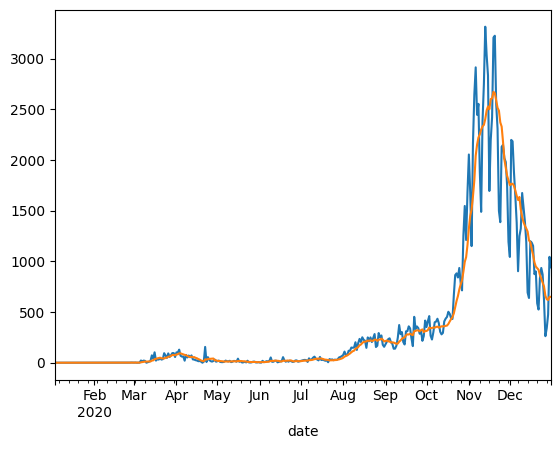

In [168]:
gr['new_cases'].plot(label='original')
gr['new_cases'].rolling('7D').mean().plot(label='original')